In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [3]:
fraud_check= pd.read_csv('D:/ExcelRassignments/Assignment15/Fraud_check.csv')
fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## EDA

In [4]:
fraud_check_df = fraud_check.copy()

In [5]:
fraud_check_df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
fraud_check_df.shape

(600, 6)

In [7]:
fraud_check_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
fraud_check_df[fraud_check_df.duplicated()].shape

(0, 6)

<AxesSubplot:>

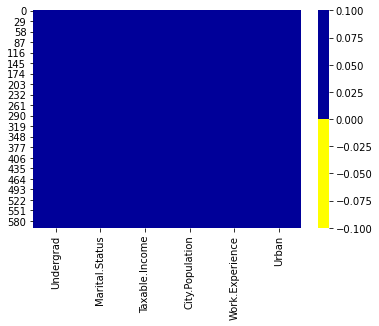

In [9]:
cols = fraud_check_df.columns
colours = ['#ffff00', '#000099']
sns.heatmap(fraud_check_df[cols].isnull(), cmap=sns.color_palette(colours))

In [11]:
fraud_check_df= fraud_check_df.rename({'Marital.Status':'Marital', 'City.Population':'Population', 'Work.Experience':'Experience', 'Taxable.Income':'Tax-Income'}, axis=1)
fraud_check_df.head()

,Undergrad,Marital,Tax-Income,Population,Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


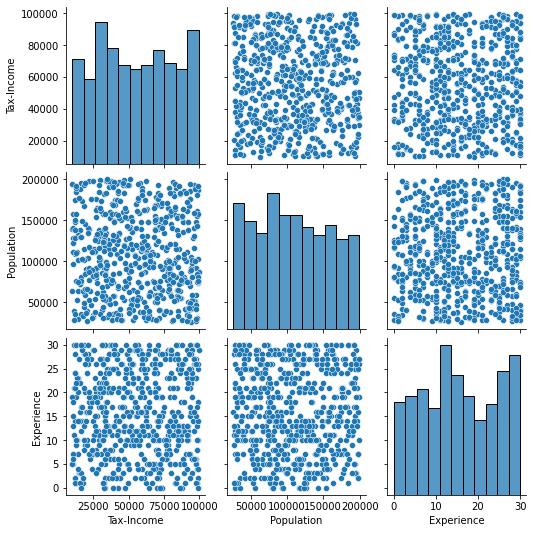

In [12]:
sns.pairplot(fraud_check_df)
plt.show()

In [13]:
fraud_check_df.corr()

,Tax-Income,Population,Experience
Tax-Income,1.000000,-0.064387,-0.001818
Population,-0.064387,1.000000,0.013135
Experience,-0.001818,0.013135,1.000000


In [14]:
import sweetviz as sv
sweet_report = sv.analyze(fraud_check_df)
sweet_report.show_html('Random_Forest_Fraud_Check_EDA_Report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Random_Forest_Fraud_Check_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Label Encoder

In [15]:
labelencoder = LabelEncoder
cols = ['Undergrad', 'Marital', 'Urban']
fraud_check_df[cols]= fraud_check_df[cols].apply(LabelEncoder().fit_transform)
fraud_check_df.head()

,Undergrad,Marital,Tax-Income,Population,Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


### Coverting Taxable Income Variable to bucketing

In [16]:
fraud_check_df['Income']='<=30000'
fraud_check_df.loc[fraud_check_df['Tax-Income']>=30000, 'Income'] = '1'         #Good=1
fraud_check_df.loc[fraud_check_df['Tax-Income']<=30000, 'Income'] = '0'         #Risky=0

In [17]:
fraud_check_df

,Undergrad,Marital,Tax-Income,Population,Experience,Urban,Income
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1


In [18]:
fraud_check_df1=fraud_check_df.drop('Tax-Income', axis=1)

In [19]:
fraud_check_df1.head()

,Undergrad,Marital,Population,Experience,Urban,Income
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1


In [20]:
fraud_check_df1=fraud_check_df1.astype({'Income':'int'})

## Normalization Function

In [21]:
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return(x)

In [22]:
fraud_check_df1=norm_func(fraud_check_df1.iloc[:, 0:])

In [23]:
fraud_check_df1= fraud_check_df1.astype({'Undergrad':'int', 'Marital':'int', 'Urban':'int', 'Income':'int'})

In [24]:
fraud_check_df1.head()

,Undergrad,Marital,Population,Experience,Urban,Income
0,0,1,0.139472,0.333333,1,1
1,1,0,0.622394,0.600000,1,1
2,0,0,0.772568,1.000000,1,1
3,1,1,0.962563,0.500000,1,1
4,0,0,0.010081,0.933333,0,1


## Random Forest Classification

In [25]:
X = fraud_check_df.iloc[:, 0:5]
Y = fraud_check_df['Income']

num_tree = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = RandomForestClassifier(n_estimators=num_tree, max_features=max_features)
results = cross_val_score(model, X, Y, cv = kfold)

In [26]:
results

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.98333333, 1.        , 1.        , 1.        , 1.        ])

## Splitting data into Training and Testing Dataset

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=40)

In [28]:
model=RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
pred = model.predict(x_test)
pd.Series(pred).value_counts()

1    92
0    28
dtype: int64

## Confusion Matrix

In [30]:
cm = pd.crosstab(y_test, pred)
cm

col_0,0,1
Income,,
0,28,0
1,0,92


## Interpretation

### As per my analysis 99% people having taxable income >30000, we are considering this model as Good.